## PROJECT INSTABOT-II
#### BY: ADITI DONA

In [149]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup as bs
import time
import matplotlib.pyplot as plt

wait=WebDriverWait(driver,10) # explicit wait

## Login to Instagram

In [145]:
from selenium import webdriver
driver=webdriver.Chrome(executable_path='/Users/Aditi Dona/Downloads/chromedriver')
driver.get('https://www.instagram.com/')

In [147]:
user=driver.find_element_by_name('username') 
pas=driver.find_element_by_name('password')
user.send_keys('SAMPLE USERNAME')
pas.send_keys('SAMPLE PASSWORD')
pas.submit()

##### SEARCH_HANLDES: Function to search text on the search bar and open the drop down. (VERY USEFUL IN PARTS OF THE PROJECT)

In [137]:
def search_handles(text):
    search=driver.find_element_by_class_name('wUAXj')
    search.click()
    t=driver.find_element_by_class_name('x3qfX')
    t.send_keys(text)
    t.send_keys(Keys.ENTER)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'fuqBx')))
top_5_handles=[]

### 1.Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
##### 1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [148]:
def top_5_handles_related_to(category):
    search_handles(category) #function call to search_handles
    # MAKING A LIST OF ALL INSTAGRAM HANDLES WHICH ARE SHOWN IN THE DROPDOWN RELATED TO FOOD
    names=driver.find_elements_by_class_name('Ap253') 
    handles=[]
    for i in range(len(names)):
        if(names[i].text.startswith('#')):
            continue
        handles.append(names[i].text) # LIST OF ALL HANDLES WITHOUT HASHTAGS
    
    c=0
    d={} #DICTIONARY WITH KEYS->handles,VALUE->no_of_followers
    for i in handles:
        if c>10:
            break
        profile=driver.find_element_by_partial_link_text(i) #SEARCH FOR THE TEXT IN THE DROPDOWN
        profile.click() 
        wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers'))) #WAIT UNTIL PAGE LOADS
        data=bs(driver.page_source,'html.parser') 
        #LOCATING THE NUMBER OF FOLLOWERS FROM THE PAGE
        section=data.body.find_all(class_='g47SY')
        temp=section[1]['title']
        temp=temp.replace(',','')
        if i not in d:
            d[i]=int(temp)
        driver.back()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'wUAXj')))
        search_handles(category)
        c+=1
        
    #SORTING THE DICTIONARY   
    d=dict(sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 
    
    #FINDING THE TOP_5_HANDLES
    c=0
    top_5_handles=[]
    no_of_followers_of_top_5=[]
    for i in d:
        if c>=5:
            break
        top_5_handles.append(i)
        no_of_followers_of_top_5.append(d[i])
        c+=1
    
    #RETURNING TOP_5_HANDLES AND THEIR NUMBER_OF_FOLLOWERS
    return top_5_handles,no_of_followers_of_top_5

In [150]:
top_5_handles,no_of_followers_of_top_5=top_5_handles_related_to('food') 
print('TOP 5 HANDLES WITH HIGHEST FOLLOWERS ARE:')
for i in range(5):
    print(top_5_handles[i],"-->>",no_of_followers_of_top_5[i])

TOP 5 HANDLES WITH HIGHEST FOLLOWERS ARE:
foodnetwork -->> 10288639
buzzfeedfood -->> 3742355
foodgod -->> 3612408
dilsefoodie -->> 457274
foodtalkindia -->> 295752


##### 1.2) Find the number of posts these handles have done in the previous 3 days.
##### 1.3) Depict this information using a suitable graph.

In [272]:
def no_of_posts_in_last_3_days(top_5):
    d={} #DICTIONARY WITH KEYS->handle_name,VALUES->no_of_posts
    for j in top_5:
        search_handles(j) #FUNCTION CALL
        profile=driver.find_element_by_partial_link_text(j)
        profile.click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))) #WAIT UNTIL PAGE LOADS

        #LOCATE THE POSTS OF THE HANDLE AND ITERATE OVER THEM
        posts=driver.find_elements_by_class_name('_9AhH0') 
        count=0
        for i in posts:
            i.click()
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_97aPb'))) #WAIT FOR POST DIALOG TO OPEN
            data=bs(driver.page_source,'html.parser')
            #GET THE DETAILS OF WHEN THE POST WAS UPLOADED
            time=data.find('time',class_='_1o9PC').text 
            if ('hours' in time) | ('minutes' in time) | ('day' in time):    #LIKE 'HOURS AGO' OR 'MINUTES AGO' OR '1 DAY AGO'
                count+=1
            elif 'days' in time:    #LIKE '4 DAYS AG0'
                if(time[0]<=3):
                    count+=1
            else:    #LIKE MAY 3,2020 THEN IGNORE
                cross=driver.find_element_by_css_selector("[aria-label=Close]")#locate the cross button and close 
                cross.click()
                wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers'))) #wait until closed
                break
            cross=driver.find_element_by_css_selector("[aria-label=Close]") #locate the cross button to close the post dialog
            cross.click()
            wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers'))) 
            
        #UPDATE THE DICTIONARY
        if j not in d:
            d[j]=count
        else:
            d[j]=d[j]+count
        
    print('NO. OF POSTS BY TOP 5 HANDLES IN LAST 3 DAYS')
    number=[]
    for i in d:
        number.append(d[i]) #APPEND THE NUMBER OF POSTS IN 'number'
        print(i,':',d[i])
    
    #BAR GRAPH TO REPRESENT DATA
    plt.bar(top_5,number,color=['red','yellow','green','blue','pink'],edgecolor='black') #HERE top_5 HAS TOP_5 HANDLES
    plt.xticks(rotation=90)
    plt.xlabel('top 5')
    plt.ylabel('No. of Posts')
    plt.title('NO. OF POSTS IN LAST 3 DAYS BY TOP 5 FOOD HANDLES')
    plt.show()                

NO. OF POSTS BY TOP 5 HANDLES IN LAST 3 DAYS
foodnetwork : 33
buzzfeedfood : 0
foodgod : 2
dilsefoodie : 6
foodtalkindia : 13


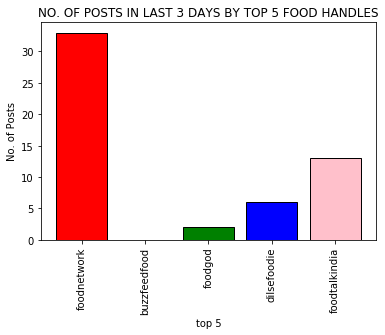

In [274]:
no_of_posts_in_last_3_days(top_5_handles) #PASSING THE TOP_5_HANDLES LIST OBTAINED FROM PREVIOUS DATA

### 2.Your friend also needs a list of hashtags that he should use in his posts.
##### 2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [160]:
def content_of_first_10_posts(top_5):
    d={} #DICTIONARY WITH KEYS->handle_name,VALUE->post_number
    for i in top_5:
        search_handles(i) #FUNCTION CALL
        profile=driver.find_element_by_partial_link_text(i)
        profile.click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))) #LOCATE first 10 POSTS
        posts=driver.find_elements_by_class_name('_9AhH0')
        d1={} #DICTIONARY WITH KEYS->post_number,VALUE->post_content
        for j in range(10):
            posts[j].click() 
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_97aPb')))        
            data=bs(driver.page_source,'html.parser')
            data=data.find_all('span',class_='') #LOCATE THE POST CONTENT ON THE WEBPAGE
            content=data[2].text
            d1[j+1]=content 
            cross=driver.find_element_by_css_selector("[aria-label=Close]") #locate the cross button and close it
            cross.click()
            wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers'))) #WAIT UNTIL WEBPAGE LOADS
        
        #UPDATE THE FINAL DICTIONARY
        d[i]=d1
    
    return d   #RETURN THE FINAL DICTIONARY

In [163]:
d={}
d=content_of_first_10_posts(top_5_handles) #PASSING THE TOP_5_HANDLES LIST OBTAINED FROM PREVIOUS DATA
for i in d:
    print(i,d[i])

foodnetwork {1: "@DuffGoldman's Meaty Groom Cake 🍖🎂Duff's groom cake puts a whole new spin on savory desserts!Don't miss an all-new season of #DuffTakesTheCake > Monday at 10|9c", 2: 'The final four celebrity recruits enter boot camp to find a sweet surprise! Then, things get competitive for the main dish challenge as @chefanneburrell and @tylerflorence challenge the recruits to cook head-to-head to earn their spot in the finale. An all-new #WorstCooks is up NEXT at 9|8c.', 3: 'Catch @AltonBrown and @elizabethingramstudio as they cook LIVE on the @foodnetworkkitchen app tomorrow. What will they make? Find out at 6|5c! #altonandelizabethcooksomefood', 4: 'Best hack ever: We turned a bag of Hawaiian sweet rolls into CINNAMON BUNS!Get the recipe on your @FoodNetworkKitchen app.', 5: "Ramp up your grilled chicken using your favorite spice mix and a sweet-and-spicy glaze! You can take @chefsymon's Sweet and Spicy Honey-Glazed Grilled Chicken with Spinach Salad and Pantry Dressing class TODA

##### 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [279]:
def frequency_of_words_in_content(d):
    words=[]
    d1={} #DICTIONARY WITH KEYS->hashtags,VALUE->frequency_of_hashtags
    for i in d.values():
        for j in i.values():
            words=j.split()
            for i in words:
                if i.startswith('#'):
                    if i not in d1:
                        d1[i]=1
                    else:
                        d1[i]=d1[i]+1
    return d1    

In [280]:
freq={}
freq=frequency_of_words_in_content(d) #PASSING THE DICTIONARY WITH THE CONTENT FROM THE PREVIOUS DATA
print(freq)

{'#DuffTakesTheCake': 1, '#WorstCooks': 2, '#altonandelizabethcooksomefood': 1, '#BigTimeBake': 1, '#portlandtravel': 1, '#sushirestuarant': 1, '#sushi': 1, '#oregontravel': 1, '#sustainability': 1, '#dilsefoodie': 5, '#punjabikhaana': 1, '#food': 5, '#arjunpavbhaji': 1, '#LaalMaas': 1, '#golgappe': 1, '#jaipur': 1, '#JeeraAloo': 1, '#chickenkorma': 1, '#guitar': 1, '#frenchtoast': 1, '#TalkDrinksLove': 1, '#HappyCheeseDay': 1}


##### 2.3) Create a csv file with two columns : the word and its frequency

In [284]:
import pandas as pd
def to_dataframe(data):
    hashtag=[] #HASHTAGS
    f=[]  #FREQUENCY
    new={} #DICTIONARY
    for i in data:
        hashtag.append(i)
        f.append(data[i])
    new={'Hashtags':hashtag,'Frequency':f}
    df=pd.DataFrame(new)
    df.to_csv('Hashtags.csv',index=False)
    print(df)

In [285]:
to_dataframe(freq) #PASSING THE DICTIONARY WITH FREQUENCY FROM THE PREVIOUS DATA

                          Hashtags  Frequency
0                #DuffTakesTheCake          1
1                      #WorstCooks          2
2   #altonandelizabethcooksomefood          1
3                     #BigTimeBake          1
4                  #portlandtravel          1
5                 #sushirestuarant          1
6                           #sushi          1
7                    #oregontravel          1
8                  #sustainability          1
9                     #dilsefoodie          5
10                  #punjabikhaana          1
11                           #food          5
12                  #arjunpavbhaji          1
13                       #LaalMaas          1
14                       #golgappe          1
15                         #jaipur          1
16                      #JeeraAloo          1
17                   #chickenkorma          1
18                         #guitar          1
19                    #frenchtoast          1
20                 #TalkDrinksLove

##### 2.4) Now, find the hashtags that were most popular among these bloggers

In [168]:
def top_5_hashtags(data):
    hashtags={} #DICTIONARY WITH KEYS->top_5_handles,VALUE->frequency
    data=dict(sorted(data.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) #SORTING THE DICTIONARY
    c=0
    for i in data:
        if c>=5:
            break
        hashtags[i]=data[i] 
        c+=1
    return hashtags #RETURN TOP_5 HASHTAGS

In [169]:
top_5_h=top_5_hashtags(freq) 

print('TOP 5 HASHTAGS USED ARE:')
for i in top_5_h:
    print(i,top_5_h[i])

TOP 5 HASHTAGS USED ARE:
#food 5
#dilsefoodie 5
#WorstCooks 2
#sustainability 1
#sushirestuarant 1


##### 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

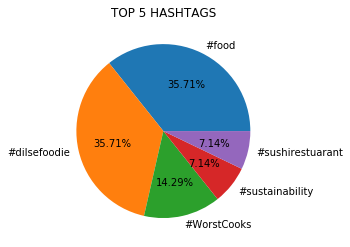

In [170]:
plt.pie(top_5_h.values(),labels=top_5_h.keys(),autopct="%.2f%%")
plt.title('TOP 5 HASHTAGS')
plt.show()

### 3. You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows: 
##### 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [236]:
def likes_of_top_10_posts(top_5):
    likes_top_5={} #DICTIONARY WITH KEYS->handle_nam,VALUE->number_of_likes_on_top_10_posts
    for j in top_5:
        search_handles(j) #FUNCTION CALL
        profile=driver.find_element_by_partial_link_text(j)
        profile.click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_9AhH0'))) #WAIT UNTIL PAGE LOADS
        posts=driver.find_elements_by_class_name('_9AhH0') #LOCATE THE POSTS OF THE HANDLE
        l=0
        d={} #DICTIONARY WITH KEYS->post_number,VALUE->likes_on_that_post
        for i in range(10):
            posts[i].click() #CLICK ON THE POST
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_97aPb'))) #WAIT UNTIL POST DIALOG OPENS
            data=bs(driver.page_source,'html.parser')
            likes=data.find(class_='Nm9Fw') #LOCATE THE SECTION WHICH DISPLAYS THE LIKES(PICTURE POST)
            
            #WHEN likes IS EMPTY THAT MEANS ITS DISPLAYING THE 'VIEWS'(VIDEO POST)
            if likes==None:
                views=driver.find_element_by_class_name('vcOH2')#LOCATE THE VIEWS AND CLICK ON IT THAT WILL SHOW THE NO_OF_LIKES
                views.click()
                wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr'))) #WAIT UNTIL A POP-UP WITH LIKES APPEAR
                new_data=bs(driver.page_source,'html.parser') 
                like=new_data.find(class_='vJRqr').span.text #LOCATE THE LIKES
                like=like.replace(',','')
                l=int(like) #LIKES ON THE VIDEO
                close=driver.find_element_by_class_name('QhbhU') #CLOSE THE POP-UP
                close.click()
            
            #WHEN LIKES IF NOT EMPTY THIS MEANS ITS DISPLAYING 'LIKES'(PICTURE POST)
            else:
                likes=likes.button.span.text #LOCATE THE LIKES
                likes=likes.replace(',',"")
                l=int(likes)
            cross=driver.find_element_by_css_selector("[aria-label=Close]") #locate the cross button and close the dialog
            cross.click()
            wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers'))) #wait until closes
            
            #UPDATE THE DICTIONARY FOR EACH POST
            d[i+1]=l
            
        #UPDATE THE FINAL DICTIONARY
        likes_top_5[j]=d
        
    return likes_top_5 #RETURN THE FINAL DICTIONARY

In [237]:
likes_top_5=likes_of_top_10_posts(top_5_handles) #PASSING THE top_5_handles FROM THE PREVIOUS DATA
print('TOTAL LIKES IN FIRST 10 POSTS OF TOP 5 HANDLES ARE:')
for i in likes_top_5:
    print(i,"----",likes_top_5[i])

TOTAL LIKES IN FIRST 10 POSTS OF TOP 5 HANDLES ARE:
foodnetwork ---- {1: 21441, 2: 29458, 3: 35471, 4: 72929, 5: 81592, 6: 98175, 7: 106255, 8: 127698, 9: 151963, 10: 171332}
buzzfeedfood ---- {1: 5166, 2: 8687, 3: 13677, 4: 25662, 5: 31452, 6: 35271, 7: 41861, 8: 44768, 9: 49887, 10: 57628}
foodgod ---- {1: 31598, 2: 55619, 3: 62066, 4: 93268, 5: 107103, 6: 167273, 7: 197706, 8: 219880, 9: 299011, 10: 324041}
dilsefoodie ---- {1: 6548, 2: 19172, 3: 27258, 4: 40617, 5: 52137, 6: 61016, 7: 68104, 8: 76536, 9: 82528, 10: 95418}
foodtalkindia ---- {1: 354, 2: 792, 3: 1261, 4: 2130, 5: 4844, 6: 5712, 7: 6033, 8: 6507, 9: 6738, 10: 7775}


##### 3.2) Calculate the average likes for a handle.

In [258]:
def average_likes(data):
    average_likes={}
    total_likes={}
    
    #CALCULATE SUM OF LIKES IN 10 POSTS FOR EACH HANDLE
    c=1
    for i in data.values():
        sum=0
        for j in i.values():
            sum+=j
        total_likes[c]=sum
        c+=1

    #CALCULATE AVERAGE LIKES FOR EACH HANDLE
    c=1
    for i in data:
        average_likes[i]=total_likes[c]//10 #LIKES ARE INTEGERS
        c+=1
    
    return average_likes #RETURN THE FINAL DICTIONARY WITH AVERAGE LIKES

In [259]:
avg_likes=average_likes(likes_top_5) #PASS THE LIKES OF EACH POST ON EACH HANDLES AS CALCULATED EARLIER 
likes_avg=[] #LIST OF AVERAGE LIKES VALUE FOR FURTHER CALCULATIONS
for i in avg_likes:
    likes_avg.append(avg_likes[i])
    print(i,'----',avg_likes[i])

foodnetwork ---- 89631
buzzfeedfood ---- 31405
foodgod ---- 155756
dilsefoodie ---- 52933
foodtalkindia ---- 4214


##### 3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
##### 3.4) Create a bar graph to depict the above obtained information.

In [268]:
def avg_follower_like_ratio(likes,followers,top_5):
    follower_like_ratio=[]
    for i in range(5):
        follower_like_ratio.append(followers[i]/likes[i]) 
    
    for i in range(5):
        print(top_5[i],"----",follower_like_ratio[i])
    
    #BAR GRAPH
    plt.bar(top_5,follower_like_ratio,color=['red','green','pink','blue','orange'],edgecolor='black')
    plt.xticks(rotation=45)
    plt.xlabel('Top 5 handles')
    plt.ylabel('Ratio=followers/avg_likes')
    plt.title('FOLLOWERS:LIKES RATIO')

foodnetwork ---- 114.78884537715746
buzzfeedfood ---- 119.16430504696704
foodgod ---- 23.19273735843242
dilsefoodie ---- 8.638731981939433
foodtalkindia ---- 70.18319886093973


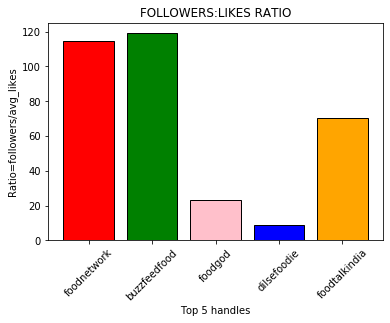

In [269]:
avg_follower_like_ratio(likes_avg,no_of_followers_of_top_5,top_5_handles) #PASS AVG LIKES VALUES,NO. OF FOLLOWERS AND TOP_5_HANDLES FROM PREVIOUS CALCULATION